In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
file_name = "training.csv"

In [3]:
df = pd.read_csv(file_name, index_col='RefId')
#df.head(5)

In [4]:
df.shape

(72983, 33)

In [5]:
# Lets see the data structure
df.info()
# This will give you an indication of how many rows and columns are present in the dataset
# alongwith their data types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72983 entries, 1 to 73014
Data columns (total 33 columns):
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationality                          72978 non-null object
Size     

In [6]:
# We will find out how many NULL values are present 
df.isnull().sum()

IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanPrice            315
MMRCurrentR

In [7]:
print(" The original shape of the df was:", df.shape)

# Dropping COLOUMN that has less than 20 Values, as it is not going to alter/skew  the data set (20 Vs ~72K) 
df = df.dropna(subset=['SubModel','Color','Transmission','Nationality','Size','TopThreeAmericanName',
                       'MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice',
                       'MMRAcquisitonRetailCleanPrice'])

# Dropping COLOUMN that has less than 300 Values(300 Vs ~72K) 
df = df.dropna(subset=['MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice',
                       'MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice'])

# Field "PRIMEUNIT" & "AUCGUART" has only 3419 entry, rest all NULL values, It is as good as not haveing  
# therse fields So we can drop these two coloumns
df = df.drop(['PRIMEUNIT','AUCGUART'], axis = 1)

#For this week we are going to delete all the Rows
#that contains null value
df = df.dropna(subset=['Trim','WheelTypeID','WheelType'])

# VehYear and VehicleAge are the same, hence removing the VehYear Col 
# WheelTypeID and WheelType are the same, hence removing WheelType Col     
df = df.drop(['VehYear','WheelType'], axis = 1)

print(" Shape of df now is: ", df.shape)

 The original shape of the df was: (72983, 33)
 Shape of df now is:  (67270, 29)


In [8]:
# No of Unique Values for each Coloum
for column in df.columns:
    print(column, len(df[column].unique()))

IsBadBuy 2
PurchDate 516
Auction 3
VehicleAge 10
Make 32
Model 957
Trim 133
SubModel 826
Color 16
Transmission 3
WheelTypeID 3
VehOdo 38083
Nationality 4
Size 12
TopThreeAmericanName 4
MMRAcquisitionAuctionAveragePrice 10198
MMRAcquisitionAuctionCleanPrice 11214
MMRAcquisitionRetailAveragePrice 12530
MMRAcquisitonRetailCleanPrice 13253
MMRCurrentAuctionAveragePrice 10176
MMRCurrentAuctionCleanPrice 11072
MMRCurrentRetailAveragePrice 12255
MMRCurrentRetailCleanPrice 12947
BYRNO 72
VNZIP1 151
VNST 37
VehBCost 2033
IsOnlineSale 2
WarrantyCost 280


In [9]:
# This step is needed if you want to convert all categorical columns to ordinal encoded numbers
# Filter the above object columns based on the object data type

object_columns = df.select_dtypes(include=['object']).columns
print(df[object_columns].head(), "\n\n")

# This method of Label Encoding assumes that we are using Tree-based models later.

from sklearn.preprocessing import LabelEncoder

# Iterate through the object columns and convert them one by one into a numerical column
for column in object_columns:
    # Instantiate a labelencoder object and then do the fit transform on the data
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    
print(df.head())

       PurchDate Auction   Make                Model Trim           SubModel  \
RefId                                                                          
1      12/7/2009   ADESA  MAZDA               MAZDA3    i         4D SEDAN I   
2      12/7/2009   ADESA  DODGE  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT   
3      12/7/2009   ADESA  DODGE           STRATUS V6  SXT   4D SEDAN SXT FFV   
4      12/7/2009   ADESA  DODGE                 NEON  SXT           4D SEDAN   
5      12/7/2009   ADESA   FORD                FOCUS  ZX3       2D COUPE ZX3   

        Color Transmission  Nationality         Size TopThreeAmericanName VNST  
RefId                                                                           
1         RED         AUTO  OTHER ASIAN       MEDIUM                OTHER   FL  
2       WHITE         AUTO     AMERICAN  LARGE TRUCK             CHRYSLER   FL  
3      MAROON         AUTO     AMERICAN       MEDIUM             CHRYSLER   FL  
4      SILVER         AUTO     AME

In [10]:
df.shape

(67270, 29)

In [11]:
# Figure out the class distribution percentage and round it to 3 decimal places

print('Percentage of negative class is {} %'.format(
    round(df['IsBadBuy'].value_counts()[0]/len(df) * 100,3)))

print('Percentage of Positive class is {} %'.format(
    round(df['IsBadBuy'].value_counts()[1]/len(df) * 100,3)))

# Watch out for situations where the percentage of one class is really small compared to the other
# In such a scenario we would need to use SMOTE or other balancing techniques

Percentage of negative class is 90.437 %
Percentage of Positive class is 9.563 %


In [12]:
X = df.drop('IsBadBuy', axis=1)
y = df['IsBadBuy']

# split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Note optionally convert the pandas dataframe into a numpy array using to_numpy if you have a big data
# and want to model faster. Otherwise it doesnt matter which data structure you use
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(53816, 28) (53816,)
(13454, 28) (13454,)


In [13]:
# LEARNING CURVE
from sklearn.ensemble import RandomForestClassifier

# This is for the hyperparam tuning and KFold CV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedShuffleSplit

# Classification metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    # call the sklearn learning_curve function 
    # that returns an array of train sizes and associated train/test scores
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    
    ############### Plotting 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    
    plt.grid()

    # Create a fuzzy margin around the main trend line with outerbounds defined by +/- std deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\owner\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

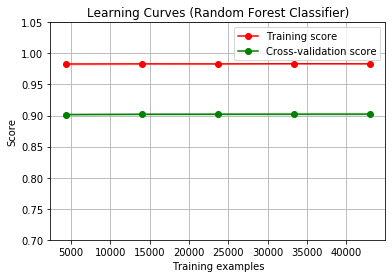

In [14]:
title = "Learning Curves (Random Forest Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.05), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from 'C:\\Users\\owner\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

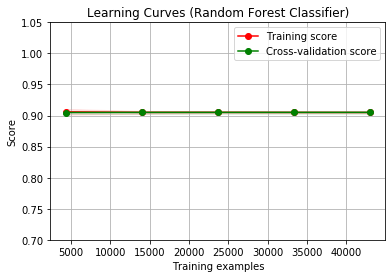

In [15]:
title = "Learning Curves (Random Forest Classifier)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier(max_depth=5)
plot_learning_curve(estimator, title, X_train, y_train, ylim=(0.7, 1.05), cv=cv, n_jobs=4)

# Just using 2 hyperparams resulted in a significant improvement in the variance by reducing the gap


In [16]:
# Maximum number of levels in tree
max_depth = [3, 4, 5, 6, 7]

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5, 6, 7]

class_weight = ['balanced', {0:1,1:2}, {0:1,1:3}, {0:1,1:4}, {0:1,1:5}]

# Create the grid for the random search. 
rf_params = {'max_depth': max_depth,
             'min_samples_split': min_samples_split,
             'min_samples_leaf': min_samples_leaf,
             'class_weight':class_weight}

In [17]:
def hyper_param_search_function(X_train, y_train, hyper_param_space, 
                                classifier_type = RandomForestClassifier, n_iter = 30,
                                 search_method = 'random_search'):
    '''
    Args: training data + hyperparam search space according to the sklearn classifier being passed;
    
    The search_method specifies whether its a RandomSearchCV or a GridSearchCV being passed inside
    
    '''
    # This is to store the best_params and the roc from each fold 
    hyperparam_results = {}

    cv_fold_X_train, cv_fold_X_val, cv_fold_y_train, cv_fold_y_val = train_test_split(X_train, y_train, 
                                                        test_size=0.2, random_state=42, stratify=y_train)

    # Instantiate a classifier (eg:RandomForest) object along with the hyperparam range
    if search_method == 'random_search':
        search_object = RandomizedSearchCV(classifier_type(), 
                                  hyper_param_space, cv = 5, n_iter = n_iter,
                                  verbose=4, random_state=42, n_jobs = -1)

    elif search_method == 'grid_search':
        search_object = GridSearchCV(classifier_type(), 
                                  hyper_param_space, cv = 5, 
                                  verbose=4, n_jobs = -1)

    # I have deliberately used the if-else statement because 
    # there are slight syntactical differences between the parameter inputs for Random vs Grid Search

    # Actually fitting the model on the subset of the training data
    model = search_object.fit(cv_fold_X_train, cv_fold_y_train)

    # We really need just 2 sets of data: the best hyperparam combo and validation performance estimate
    hyperparam_results['best_params'] = model.best_params_
    
    # Get the model with the best combination of hyperparams, use it to predict on validation fold
    optimised_model = model.best_estimator_

    """
    # .... and store all the relevant classification metrics
    classification_metrics_dict = metrics_store_function(optimised_model, cv_fold_X_val, cv_fold_y_val)
  
    hyperparam_results['classification_metrics'] = classification_metrics_dict

    ######### Pretty print
    print('---' * 45)
    print('')

    print("Accuracy: {}".format(round(classification_metrics_dict['accuracy'],4)))
    print("Precision: {}".format(round(classification_metrics_dict['precision']),4))
    print("Recall: {}".format(round(classification_metrics_dict['recall'],4)))
    print("F1: {}".format(round(classification_metrics_dict['f1'],4)))
    print("AUC ROC: {}".format(round(classification_metrics_dict['roc_auc'],4)))

    print('---' * 45)
    """
    return hyperparam_results

In [18]:
classifier_type = RandomForestClassifier
search_method = 'grid_search'

hyperparam_results = hyper_param_search_function(X_train, y_train, rf_params, 
                                    classifier_type = classifier_type, search_method = search_method)


Fitting 5 folds for each of 700 candidates, totalling 3500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 605 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1193 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 2957 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 3500 out of 3500 | elapsed: 11.0min finished


In [19]:
hyperparam_results

{'best_params': {'class_weight': {0: 1, 1: 2},
  'max_depth': 4,
  'min_samples_leaf': 3,
  'min_samples_split': 5}}

In [20]:
from sklearn.ensemble import RandomForestClassifier

# # Get the tuned hyperparam from GridSearch results
max_depth = hyperparam_results['best_params']['max_depth']
min_samples_split = hyperparam_results['best_params']['min_samples_split']
min_samples_leaf = hyperparam_results['best_params']['min_samples_leaf']
class_weight = hyperparam_results['best_params']['class_weight']

# Instantiate the classifier with the above hyperparams
classifier = RandomForestClassifier(max_depth=max_depth, min_samples_split=min_samples_split,
                                    min_samples_leaf=min_samples_leaf,
                                    class_weight=class_weight, n_jobs = -1, random_state=42)

classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 2},
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=3,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [21]:
"""
from sklearn.ensemble import RandomForestClassifier

# Initialize a classifier object with default params
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

"""
# Make predictions using both train and test set
rf_train_pred = classifier.predict(X_train)
rf_test_pred = classifier.predict(X_test)

training_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test, y_test)

print("Has a training accuracy of {} % ".format(round(training_score.mean(), 5) * 100))
print("Has a test accuracy of {} % ".format(round(test_score.mean(), 5) * 100))
# The accuracy score on its own is less useful for classification. Need to check the confusion matrix
# Notice how severe the overfitting is

Has a training accuracy of 90.501 % 
Has a test accuracy of 90.241 % 


In [22]:
from sklearn.metrics import classification_report
print("classification_report\n", classification_report(y_train, rf_train_pred), "\n")


print("classification_report\n", classification_report(y_test, rf_test_pred), "\n")
# As can be seen in the report below, the F1 score can be improved

classification_report
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     48697
           1       0.89      0.00      0.00      5119

    accuracy                           0.91     53816
   macro avg       0.90      0.50      0.48     53816
weighted avg       0.90      0.91      0.86     53816
 

classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     12140
           1       0.67      0.00      0.00      1314

    accuracy                           0.90     13454
   macro avg       0.78      0.50      0.48     13454
weighted avg       0.88      0.90      0.86     13454
 



In [23]:
import itertools
# This is from sklearn's example page 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[12139     1]
 [ 1312     2]]


Of the 13454 items in the Test set,
The model correctly predicts 2 true positives while missing out on 1312 false negatives
It also picks up 1 false positives


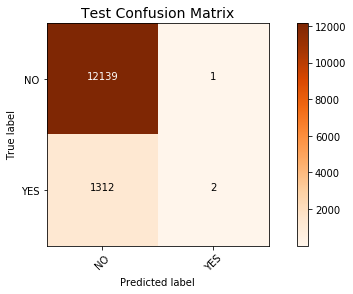

In [24]:
labels = ['NO', 'YES']
from sklearn.metrics import confusion_matrix

# Call the function above for the....
# training data 
confusion_matrix_train_object = confusion_matrix(y_train, rf_train_pred)

# and
# test data
confusion_matrix_test_object = confusion_matrix(y_test, rf_test_pred)


fig = plt.figure(figsize=(8,4))
plot_confusion_matrix(confusion_matrix_test_object, labels, title="Test Confusion Matrix", 
                      cmap=plt.cm.Oranges)

print('\n')
tn, fp, fn, tp = confusion_matrix_test_object.ravel()
print('Of the {} items in the Test set,'.format(len(y_test)))
print('The model correctly predicts {} true positives while missing out on {} false negatives'.format(
tp, fn))

print('It also picks up {} false positives'.format(fp))

# FP of  of  is pretty bad. 
# FN of  of  is also pretty bad. 

In [25]:
from sklearn.metrics import roc_auc_score
print("Test:", roc_auc_score(y_test, rf_test_pred))
print("Train:", roc_auc_score(y_train, rf_train_pred))

Test: 0.5007198488461606
Train: 0.5007711350447477
